<a href="https://colab.research.google.com/github/AlexGCas/medcat_mock_data_exploration/blob/main/exploracion_medcat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import PIL

# Exploración de datasets y análisis estadístico

## tipos de datos
desde el punto de vista de la estadística:
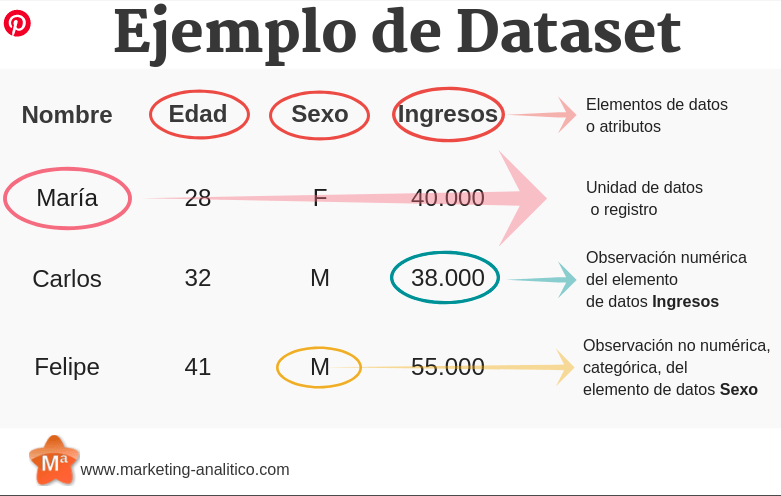

el análisis de los datos depende del tipo de dato:
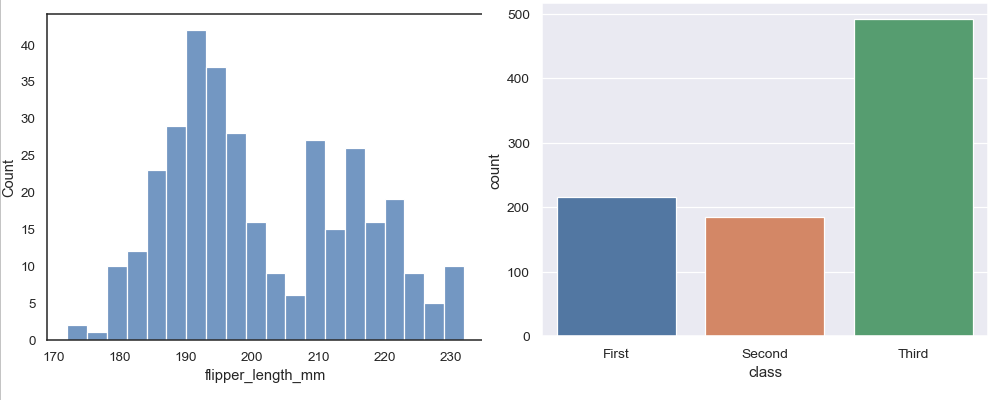


# preguntas a la hora de analizar un dataset:
lectura recomendada: https://www.kaggle.com/startupsci/titanic-data-science-solutions

1. cuales son las columnas?
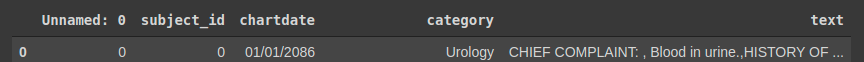

2. cuantos datos tiene?
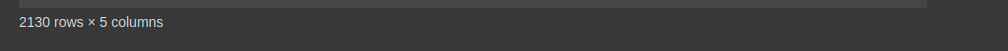
3. cuales columnas son categoricas y cuales son numericas?
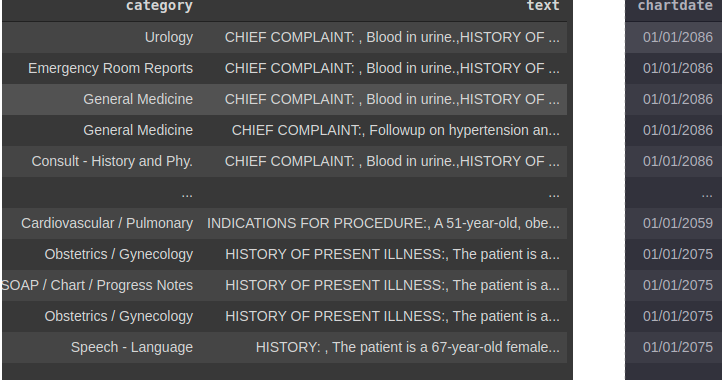

4. Como se distribuyen las variables categóricas?

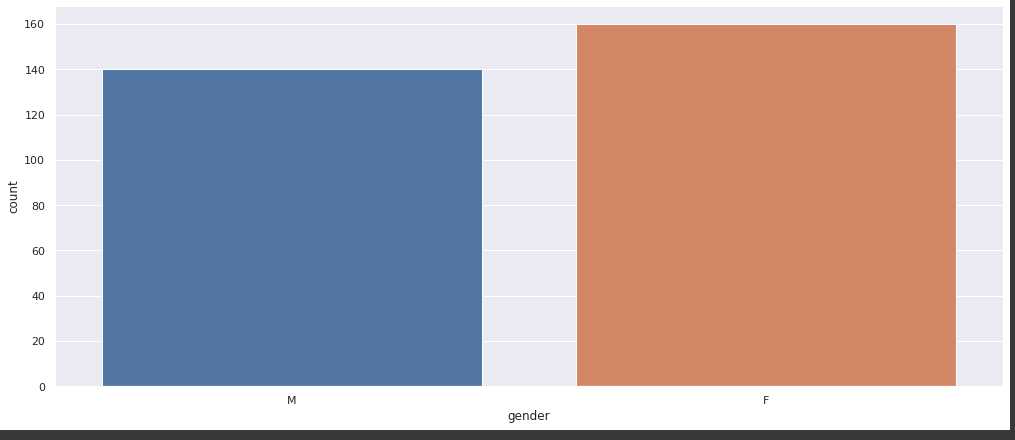

5. Como se distribuyen las variables numéricas?

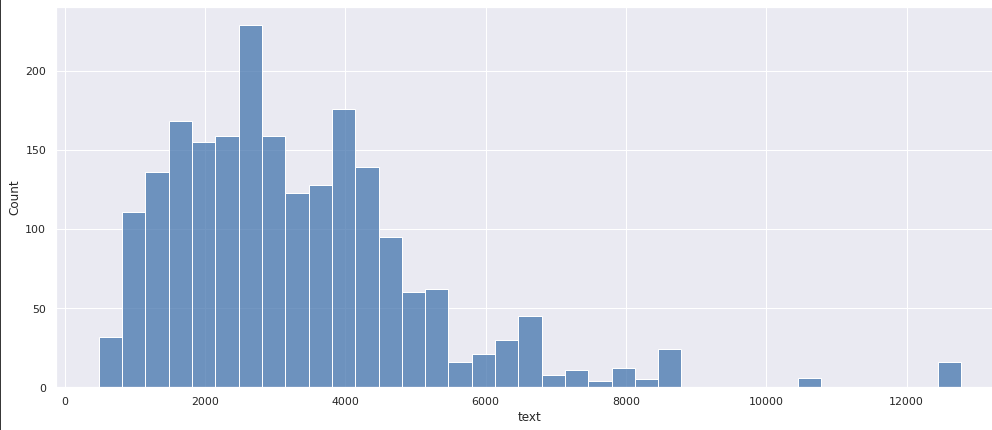

In [ ]:
'''en qué directorio estamos actualmente?'''
print("el directorio actual es: "os.getcwd())

'/content'

In [ ]:
'''
para cambiar el directorio actual al directorio de destino
NOTA: 1) primero hay qué montar el drive.
2) la ruta varía de drive en drive según como estén organizados los archivos.
'''
os.chdir("/content/drive/MyDrive/exploracion")
'''el nuevo directorio actual y los archivos que hay en ese directorio'''
print("directorio actual: ", os.getcwd())
print("lista de archivos en el directorio actual: ", *os.listdir())

directorio actual:  /content/drive/MyDrive/exploracion
lista de archivos en el directorio actual:  exploracion_medcat.ipynb train.csv


In [ ]:
'''
el archivo train.csv no tiene nada que ver con medcat, solo va a ser utilizado
dar ejemplo de caracteristicas de pandas y fue tomado de kaggle.com.
para incluir los datos de ejemplo de medcat es necesario descargarlos manualmente
o clonar el repositorio de github, para clonar el repositorio de github:
'''
!git clone https://github.com/CogStack/MedCAT
print("los archivos en la carpeta ahora son: ", os.listdir())
print("dentro de la carpeta medcat hay: ", os.listdir("./MedCAT"))
print("dentro de la carpeta del tutorial: ", os.listdir("./MedCAT/tutorial"))
print("dentro de la carpeta del data: ", os.listdir("./MedCAT/tutorial/data"))

fatal: destination path 'MedCAT' already exists and is not an empty directory.
los archivos en la carpeta ahora son:  ['exploracion_medcat.ipynb', 'train.csv', 'MedCAT']
dentro de la carpeta medcat hay:  ['.git', '.dockerignore', '.gitignore', 'CODE_OF_CONDUCT.md', 'LICENSE', 'README.md', 'configs', 'examples', 'medcat', 'media', 'models', 'requirements.txt', 'setup.py', 'tests', 'tutorial', 'webapp']
dentro de la carpeta del tutorial:  ['README.md', 'data']
dentro de la carpeta del data:  ['MedCAT_Export.json', 'cdb_advanced.csv', 'cdb_simple.csv', 'cui_location.json', 'noteevents.csv', 'patients.csv', 'pt_notes.csv', 'vocab_data.txt']


In [ ]:
'''de acuerdo a los autores, los archivos de interés son noteevents.csv y patients.csv, para cargar los archivos:'''
noteEventsDataframe = pd.read_csv("./MedCAT/tutorial/data/noteevents.csv")
patientsDataframe = pd.read_csv("./MedCAT/tutorial/data/patients.csv")

In [ ]:
'''cuales son las columnas de ambos dataframe? cuantos datos hay?'''
print("columnas de patients: ", patientsDataframe.columns)
print("cantidad de datos en patients: ", patientsDataframe.shape)
print("columnas de noteevents: ", noteEventsDataframe.columns)
print("cantidad de datos en noteevents: ", noteEventsDataframe.shape)

columnas de patients:  Index(['Unnamed: 0', 'subject_id', 'gender', 'dob'], dtype='object')
cantidad de datos en patients:  (300, 4)
columnas de noteevents:  Index(['Unnamed: 0', 'subject_id', 'chartdate', 'category', 'text'], dtype='object')
cantidad de datos en noteevents:  (2130, 5)


In [ ]:
'''en patients, cuales columnas son categoricas y cuales son numéricas?'''
'''la única columna categórica es gender, la única columna numérica es dob (date of birth)'''
patientsDataframe.head()

,Unnamed: 0,subject_id,gender,dob
0,0,0,M,1/1/2018
1,1,1,F,1/1/2018
2,2,2,F,1/1/2018
3,3,3,M,1/1/2018
4,4,4,M,1/1/2018


In [ ]:
'''en noteevents, cuales columnas son categoricas y cuales son numéricas?'''
'''category es categorica, chardate nuevamente es numérica'''
noteEventsDataframe.head()

,Unnamed: 0,subject_id,chartdate,category,text
0,0,0,01/01/2086,Urology,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
1,1,0,01/01/2086,Emergency Room Reports,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
2,2,0,01/01/2086,General Medicine,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
3,3,0,01/01/2086,General Medicine,"CHIEF COMPLAINT:, Followup on hypertension an..."
4,4,0,01/01/2086,Consult - History and Phy.,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."


La exploración anterior permite decidir como vamos a visualizar la información contenida en las columnas. adicionalmente, la columna text no se cataloga como numérica o categorica, sin embargo, luego se van a realizar análisis con estas variables.

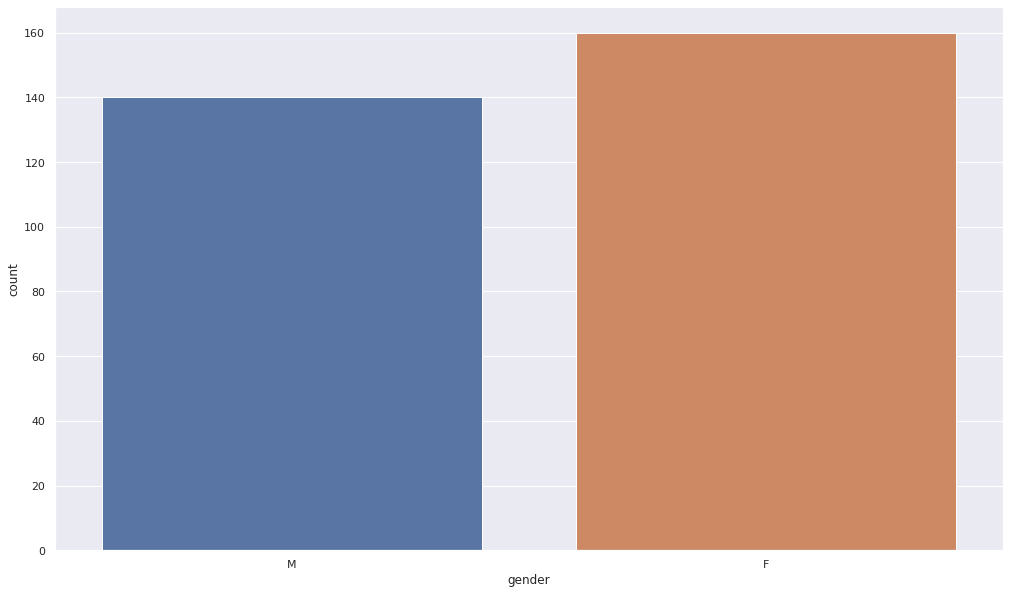

,Unnamed: 0,subject_id,dob
gender,,,
F,160,160,160
M,140,140,140


In [ ]:
'''como están distribuidos los pacientes en cuanto a género?
la tabla adecuada para el análisis es patientsDataframe porque ahí está contenida
la información del género.
para visualizar los datos se utiliza la libería seaborn porque tiene más opciones
y es más fácil de utilizar en comparación con matplotlib'''
plt.figure(figsize = (17, 10)) # figura de 17 de ancho por 10 de alto
sns.set_theme(style = "darkgrid") # 
sns.countplot(x = patientsDataframe["gender"])
plt.show()
'''se puede verificar que los datos son correctos utilizando la combinación
groupby + count'''
patientsDataframe.groupby("gender").count()

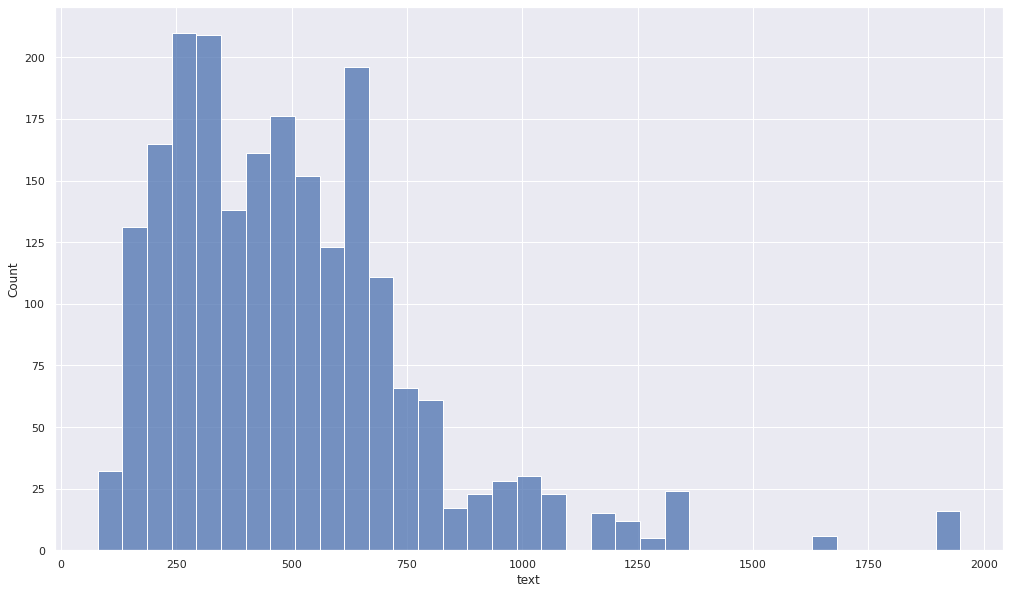

In [ ]:
'''
como saber la distribución de longitudes del texto en la columna text?
utilizando la transformacion str se puede acceder a los valores de string
en el dataframe. utilizando la propiedad len se puede acceder a la cantidad
'''
plt.figure(figsize = (17, 10))
sns.set_theme(style = "darkgrid")
sns.histplot(x = noteEventsDataframe["text"].str.split().apply(len))
plt.show()

In [ ]:
'''si se quiere eliminar los datos con más de 1100 palabras para evitar
outliers, se puede utilizar una máscara booleana
la siguiente expresión sirve para filtrar los valores que cumplan esa condición
'''
mascara = noteEventsDataframe["text"].str.split().apply(len) < 1100
mascara

0       False
1       False
2       False
3        True
4       False
        ...  
2125     True
2126     True
2127     True
2128     True
2129     True
Name: text, Length: 2130, dtype: bool

In [ ]:
'''se puede usar la máscara anterior para filtrar datos del dataset original'''
noteEventsDataframe[mascara]

,Unnamed: 0,subject_id,chartdate,category,text
3,3,0,01/01/2086,General Medicine,"CHIEF COMPLAINT:, Followup on hypertension an..."
6,6,1,01/01/2079,General Medicine,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
7,7,1,01/01/2079,Rheumatology,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe..."
8,8,1,01/01/2079,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
9,9,2,01/01/2037,Consult - History and Phy.,"CHIEF COMPLAINT:,1. Infection.,2. Pelvic pai..."
...,...,...,...,...,...
2125,2125,297,01/01/2059,Cardiovascular / Pulmonary,"INDICATIONS FOR PROCEDURE:, A 51-year-old, obe..."
2126,2126,298,01/01/2075,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a..."
2127,2127,298,01/01/2075,SOAP / Chart / Progress Notes,"HISTORY OF PRESENT ILLNESS:, The patient is a..."
2128,2128,298,01/01/2075,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a..."


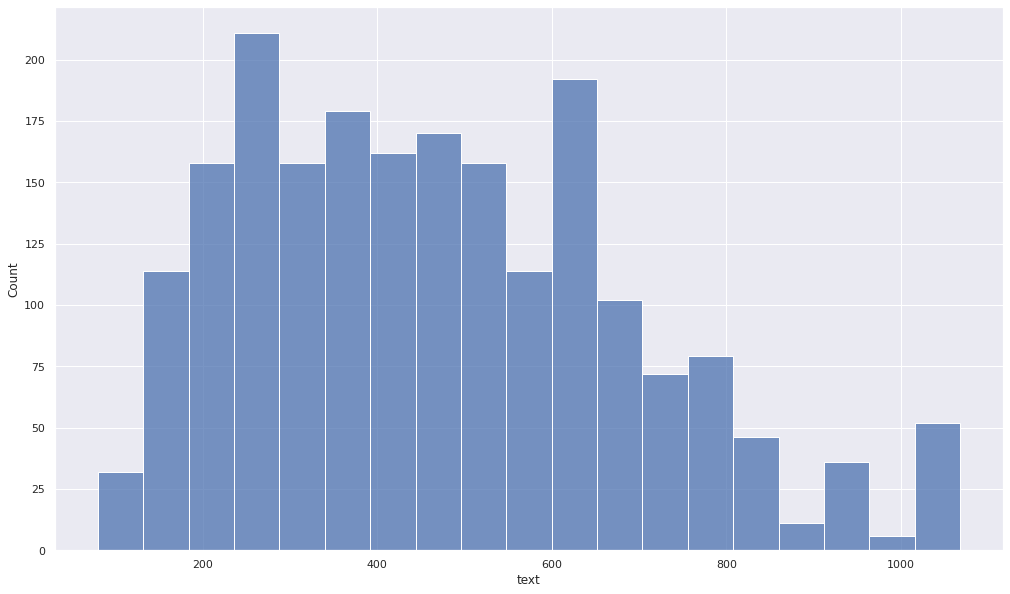

In [ ]:
plt.figure(figsize = (17, 10))
sns.set_theme(style = "darkgrid")
sns.histplot(x = noteEventsDataframe[mascara]["text"].str.split().apply(len))
plt.show()

In [ ]:
'''como aplicar 2 condiciones para filtrar el dataset?
ahora se van a excluir records de menos de 150 palabras y de más 1100 palabras
utlilizando el operador de agrupación () (si las máscaras no están dentro de variables)
y el operador lógico & (equivalente a un and)
un or se implementa con |
'''
mascara2 = noteEventsDataframe["text"].str.split().apply(len) > 150

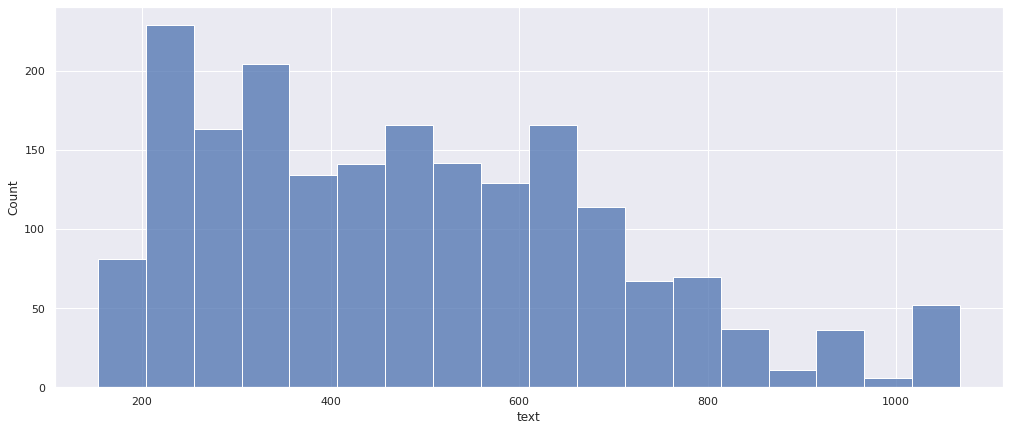

In [ ]:
plt.figure(figsize = (17, 7))
sns.set_theme(style = "darkgrid")
sns.histplot(x = noteEventsDataframe["text"].str.split().apply(len)[mascara & mascara2])

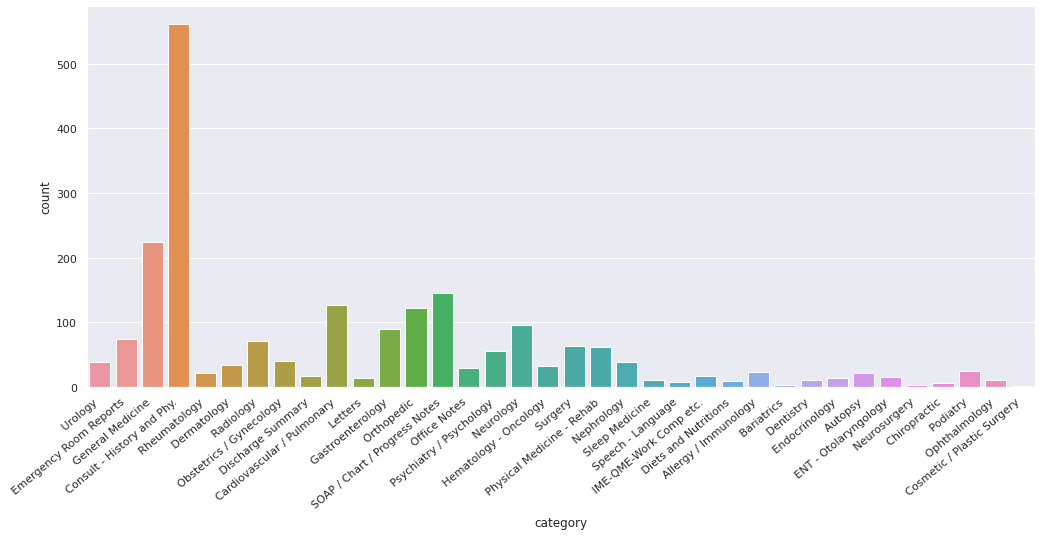

In [ ]:
'''cual es la distribución de visitas por categorías?'''
plt.figure(figsize= (17, 7))
sns.set_theme(style = "darkgrid")
ax = sns.countplot(x = noteEventsDataframe["category"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

In [ ]:
'''como obtener las edades de los pacientes cuando tuvieron una consulta?
- la información de fecha de nacimiento del paciente está en la tabla patients
- la información de la fecha de la consulta está en la tabla de noteevents
para combinar ambos datos es necesario combinar ambas tablas, esto se hace con
la función merge, la propiedad que une a la tabla de pacientes y la de
eventos es subject_id. la tabla resultante contiene la información de ambas tablas
'''
patientsEventsTable = noteEventsDataframe.merge(patientsDataframe, on = "subject_id")
patientsEventsTable.head()

,Unnamed: 0_x,subject_id,chartdate,category,text,Unnamed: 0_y,gender,dob
0,0,0,01/01/2086,Urology,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ...",0,M,1/1/2018
1,1,0,01/01/2086,Emergency Room Reports,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ...",0,M,1/1/2018
2,2,0,01/01/2086,General Medicine,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ...",0,M,1/1/2018
3,3,0,01/01/2086,General Medicine,"CHIEF COMPLAINT:, Followup on hypertension an...",0,M,1/1/2018
4,4,0,01/01/2086,Consult - History and Phy.,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ...",0,M,1/1/2018


In [ ]:
edadesDataframe = pd.DatetimeIndex(pd.to_datetime(patientsEventsTable["chartdate"])).year - pd.DatetimeIndex(pd.to_datetime(patientsEventsTable["dob"])).year

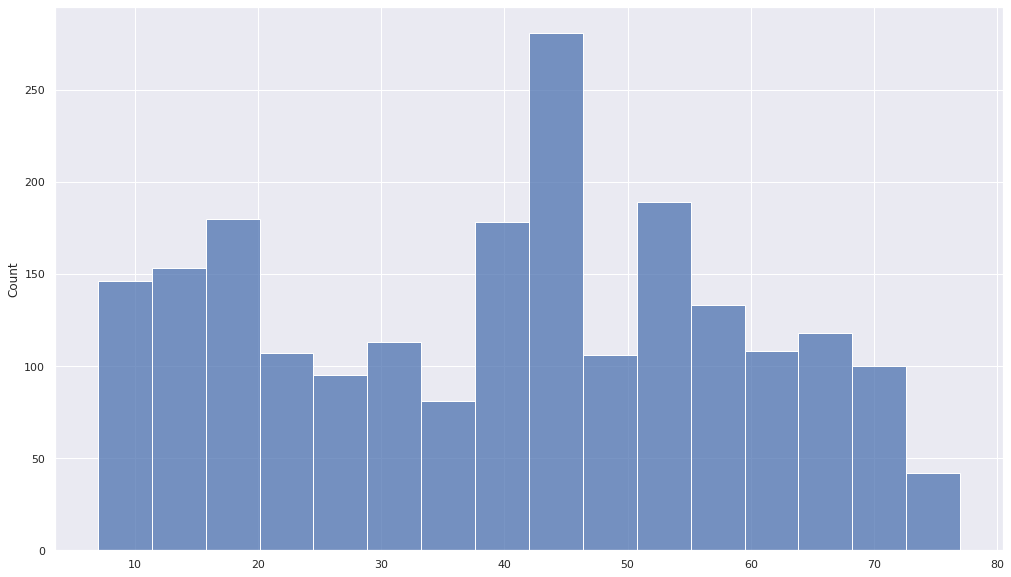

In [ ]:
plt.figure(figsize = (17, 10))
sns.set_theme(style = "darkgrid")
sns.histplot(x = edadesDataframe)